In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np
import pandas as pd

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance

In [62]:
data  = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


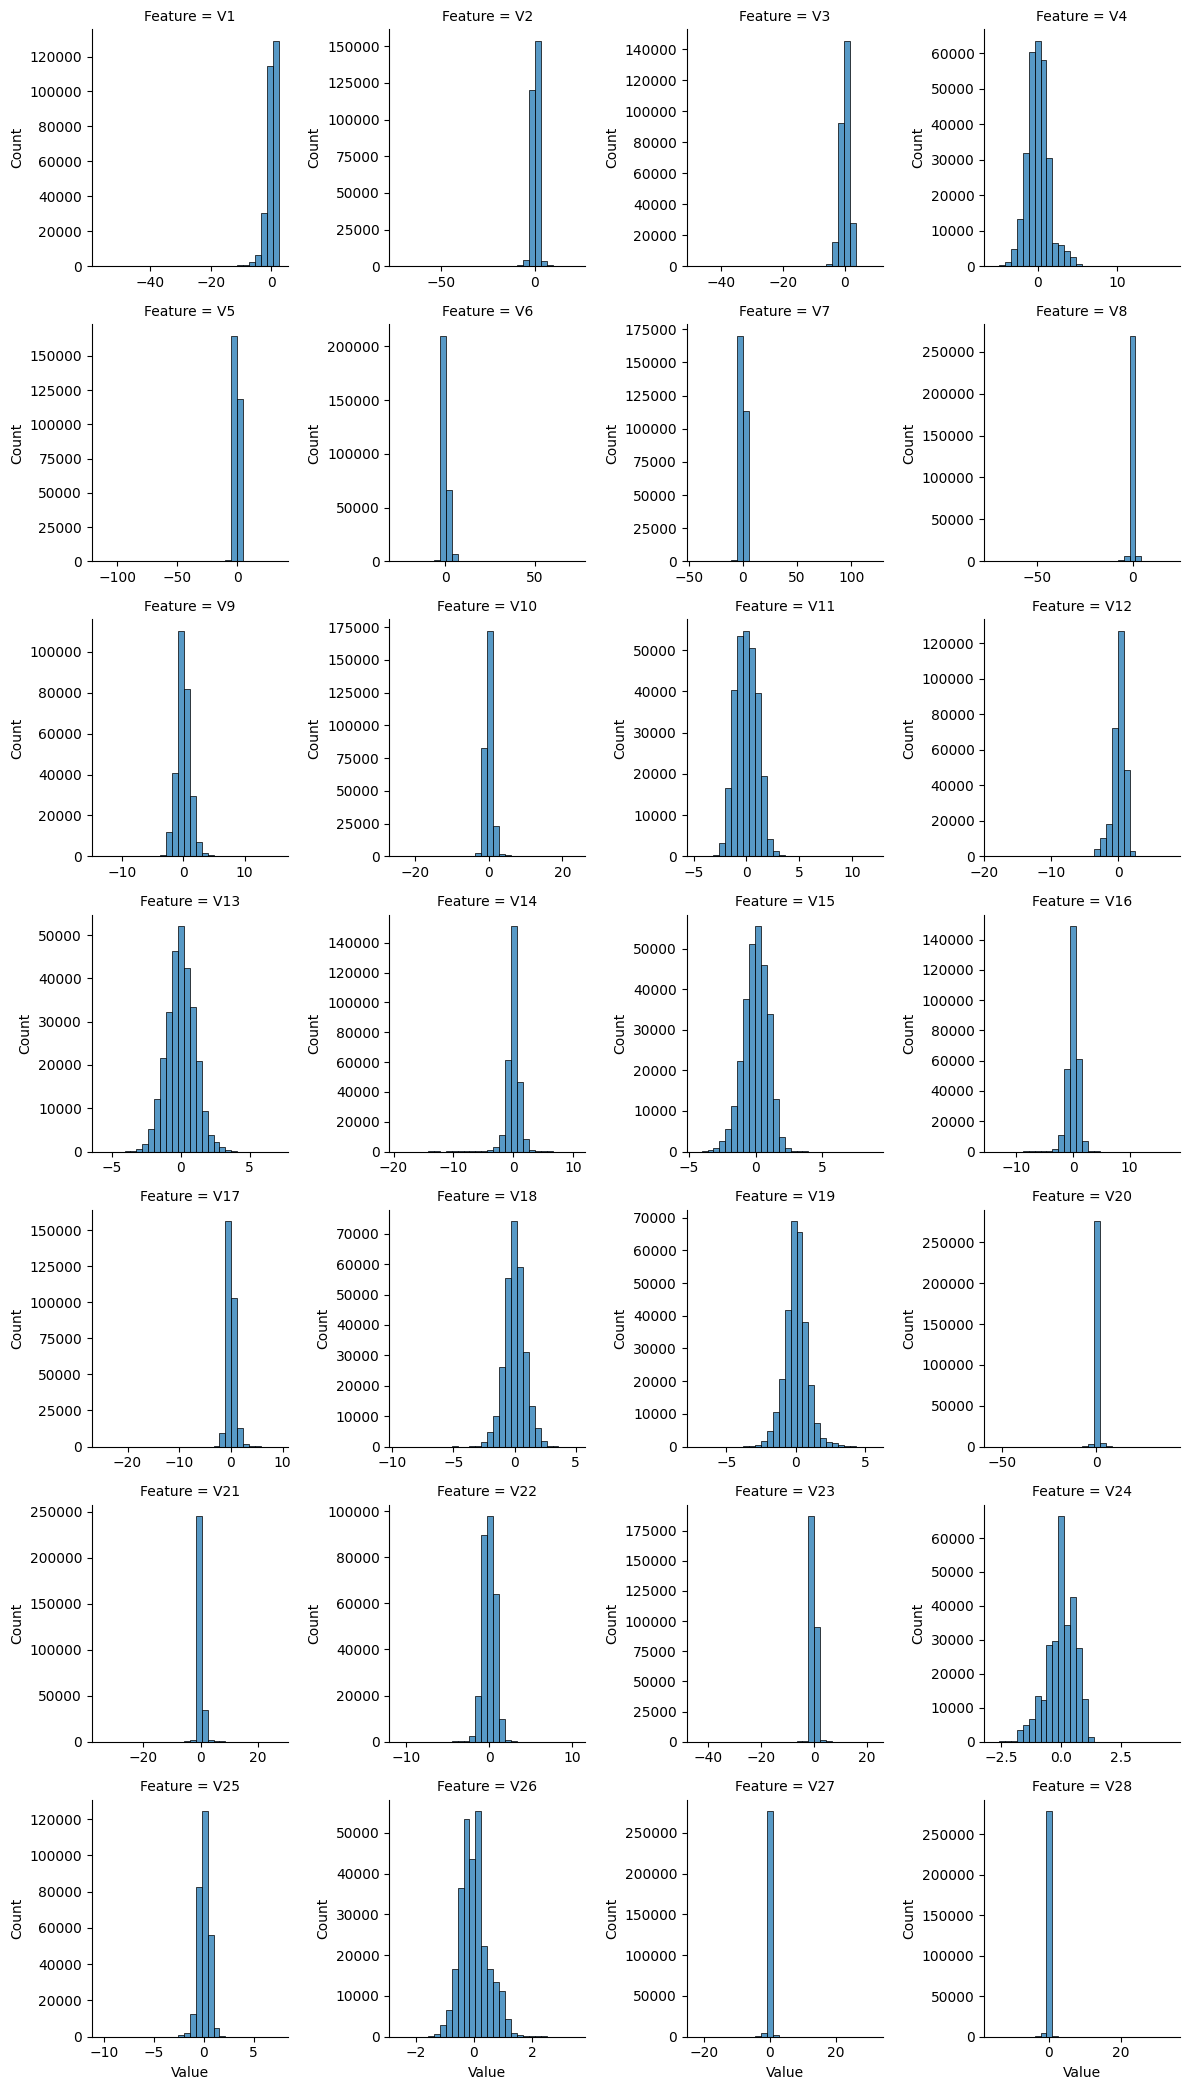

In [8]:
df_melt = data.drop(columns=['Time','Amount','Class']).melt(var_name="Feature", value_name="Value")
g = sns.FacetGrid(df_melt, col="Feature", col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, "Value", bins=30)

In [43]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [63]:
data["hour"] = (data["Time"] // 3600) % 24

In [64]:
data["time_diff"] = data["Time"].diff().fillna(0)

In [65]:
data["Timestamp"] = pd.to_datetime(data["Time"])  # ensure datetime type

data["amount_rolling_mean_5min"] = (
    data.rolling("300s", on="Timestamp", min_periods=1)["Amount"].mean()
)

data["amount_rolling_std_5min"] = (
    data.rolling("300s", on="Timestamp", min_periods=1)["Amount"].std()
).fillna(0)

In [66]:
data.drop(columns=["Time", "Timestamp"], inplace=True)

In [77]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,Class,hour,time_diff,amount_rolling_mean_5min,amount_rolling_std_5min
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0,149.6200,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0,76.1550,103.895199
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,1.0,176.9900,189.473475
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.0,163.6175,156.999237
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,1.0,144.8920,142.266623


                     Feature   Skewness    Kurtosis
0                     Amount  16.977635  845.077788
1                        V28  11.192032  933.381095
2                         V8  -8.521899  220.583080
3                  time_diff   5.883780   73.930512
4                        V23  -5.875109  440.080912
5                         V2  -4.624841   95.771404
6                        V17  -3.844894   94.798034
7                        V21   3.592972  207.283380
8                         V1  -3.280650   32.486088
9                         V7   2.553894  405.600275
10                        V5  -2.425889  206.900907
11                       V12  -2.278389   20.241493
12                        V3  -2.240144   26.619062
13                       V20  -2.037145  271.011334
14                       V14  -1.995165   23.879022
15   amount_rolling_std_5min  -1.911564    4.659311
16  amount_rolling_mean_5min  -1.833387    3.403207
17                        V6   1.826571   42.641724
18          

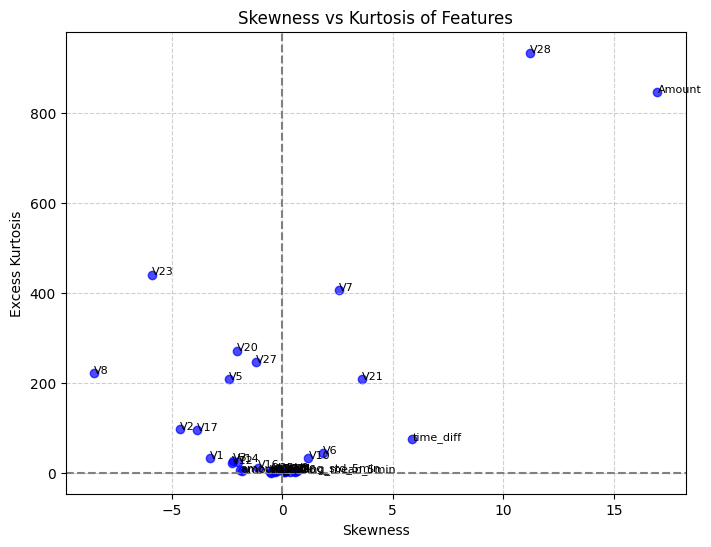

In [146]:
numeric_cols = data.drop(columns=['Class']).select_dtypes(include=[np.number]).columns

stats_df = pd.DataFrame({
    "Feature": numeric_cols,
    "Skewness": [skew(data[col].dropna()) for col in numeric_cols],
    "Kurtosis": [kurtosis(data[col].dropna()) for col in numeric_cols]  # excess kurtosis (0 = normal)
})

stats_df = stats_df.sort_values(by="Skewness", key=np.abs, ascending=False).reset_index(drop=True)

print(stats_df)


plt.figure(figsize=(8,6))
plt.scatter(stats_df["Skewness"], stats_df["Kurtosis"], c="blue", alpha=0.7)
for i, row in stats_df.iterrows():
    plt.text(row["Skewness"], row["Kurtosis"], row["Feature"], fontsize=8)

plt.axvline(0, color="gray", linestyle="--")
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Skewness")
plt.ylabel("Excess Kurtosis")
plt.title("Skewness vs Kurtosis of Features")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Transformed features: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V27', 'V28']
   Feature   Skewness    Kurtosis   Stage
0       V1  -3.280667   32.486679  Before
1       V2  -4.624866   95.773106  Before
2       V3  -2.240155   26.619551  Before
3       V4   0.676292    2.635455  Before
4       V5  -2.425901  206.904560  Before
5       V6   1.826581   42.642494  Before
6       V7   2.553907  405.607417  Before
7       V8  -8.521944  220.586974  Before
8       V9   0.554680    3.731311  Before
9      V10   1.187141   31.988239  Before
10     V11   0.356506    1.633921  Before
11     V12  -2.278401   20.241870  Before
12     V13   0.065233    0.195300  Before
13     V14  -1.995176   23.879462  Before
14     V15  -0.308423    0.284769  Before
15     V16  -1.100966   10.419131  Before
16     V17  -3.844914   94.799719  Before
17     V18  -0.259880    2.578341  Before
18     V19   0.109192    1.724970  Before
19     V20  -2.037155  27

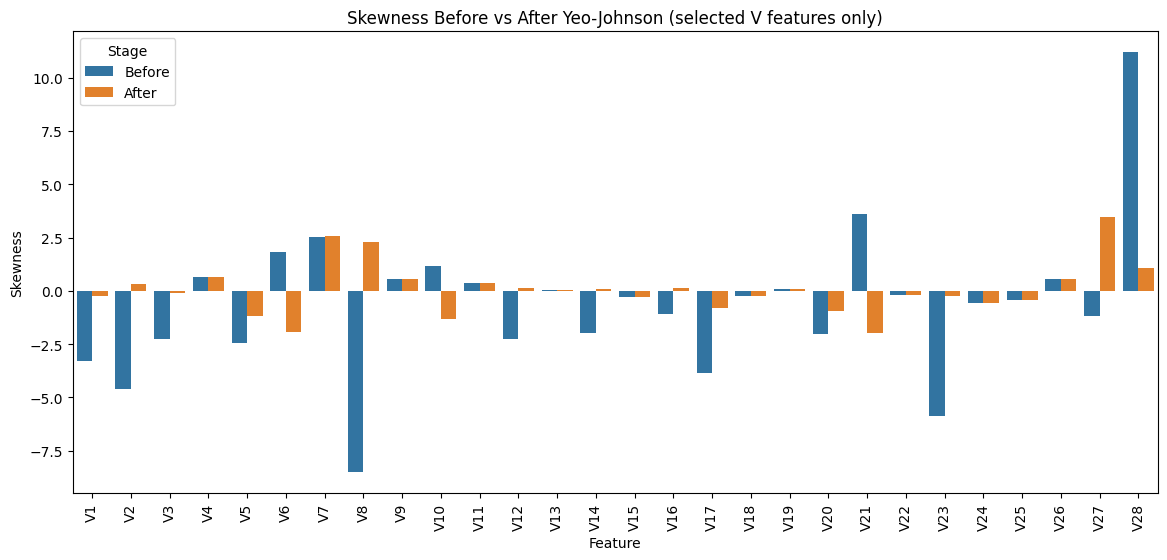

In [153]:


def compute_skew_kurt(df):
    """Return DataFrame with skewness and kurtosis for each column."""
    return pd.DataFrame({
        "Feature": df.columns,
        "Skewness": df.skew(),
        "Kurtosis": df.kurt()
    }).reset_index(drop=True)

def transform_v_features(data, skew_thresh=2, kurt_thresh=7):
    """
    Apply Yeo-Johnson transformation only to V features
    with |skewness| > skew_thresh or |kurtosis| > kurt_thresh.
    """
    v_features = [col for col in data.columns if col.startswith("V")]

    # Compute stats before
    before_stats = compute_skew_kurt(data[v_features])
    before_stats["Stage"] = "Before"

    # Pick only high-skew/kurt features
    selected_features = before_stats[
        (before_stats["Skewness"].abs() > skew_thresh) |
        (before_stats["Kurtosis"].abs() > kurt_thresh)
    ]["Feature"].tolist()

    transformed_data = data.copy()

    if selected_features:
        pt = PowerTransformer(method="yeo-johnson")
        transformed_data[selected_features] = pt.fit_transform(data[selected_features])

    # Compute stats after (only for V features)
    after_stats = compute_skew_kurt(transformed_data[v_features])
    after_stats["Stage"] = "After"

    # Combine
    stats_comparison = pd.concat([before_stats, after_stats], ignore_index=True)

    return transformed_data, stats_comparison, selected_features


transformed_data, stats_comparison, selected_features = transform_v_features(data)

print("Transformed features:", selected_features)
print(stats_comparison)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot skewness comparison
plt.figure(figsize=(14,6))
sns.barplot(data=stats_comparison, x="Feature", y="Skewness", hue="Stage")
plt.xticks(rotation=90)
plt.title("Skewness Before vs After Yeo-Johnson (selected V features only)")
plt.show()


In [150]:
X = transformed_data.drop(columns=["Class"])
Y = transformed_data["Class"]


===== Logistic Regression =====
Selected threshold: 1.000
Precision at threshold: 0.800
Recall at threshold: 0.816

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.82      0.80        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



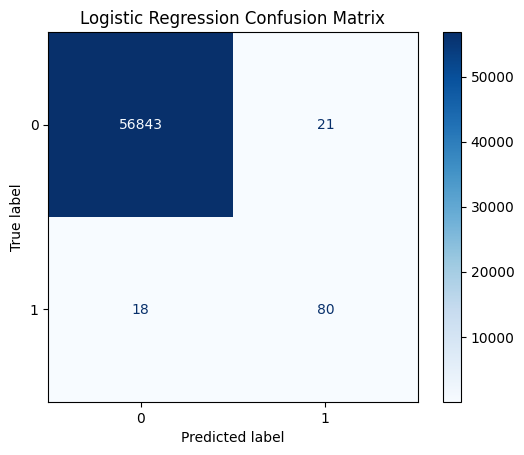

Average Precision (PR-AUC): 0.723


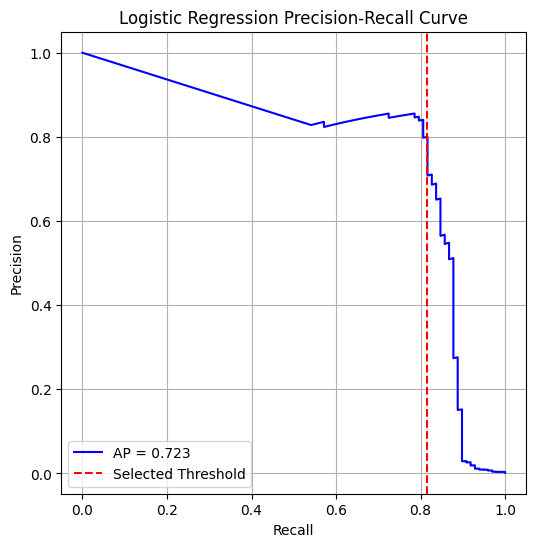

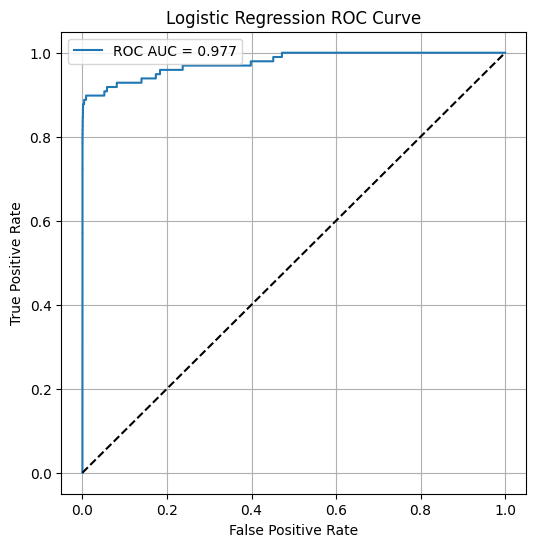

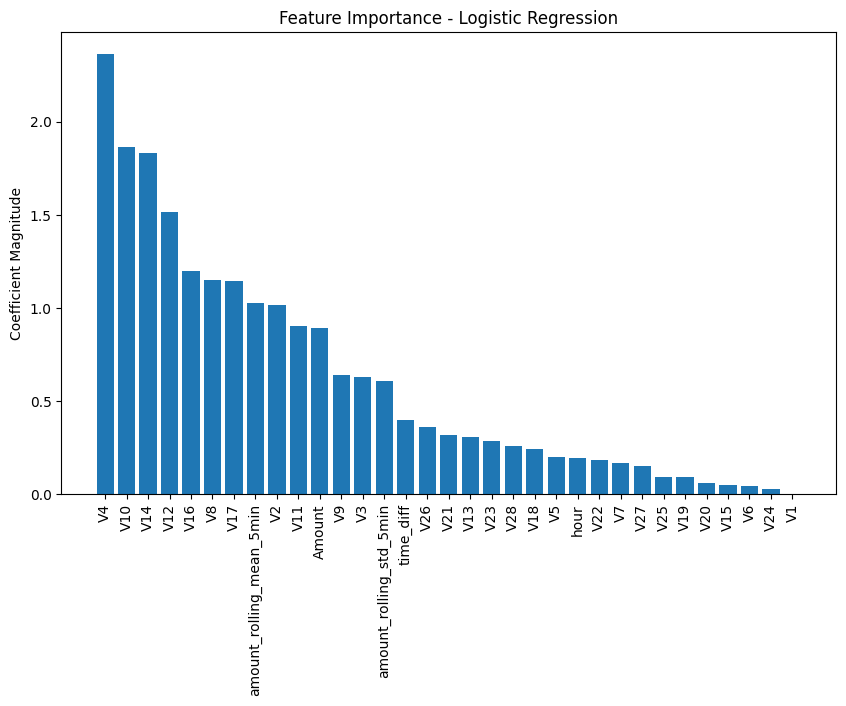


===== XGBoost Classifier =====
Selected threshold: 0.340
Precision at threshold: 0.806
Recall at threshold: 0.847

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.85      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



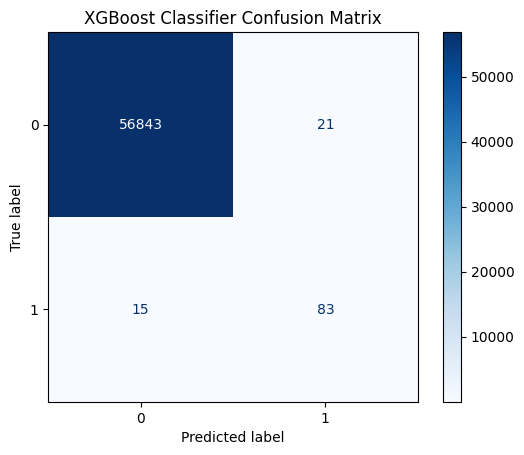

Average Precision (PR-AUC): 0.867


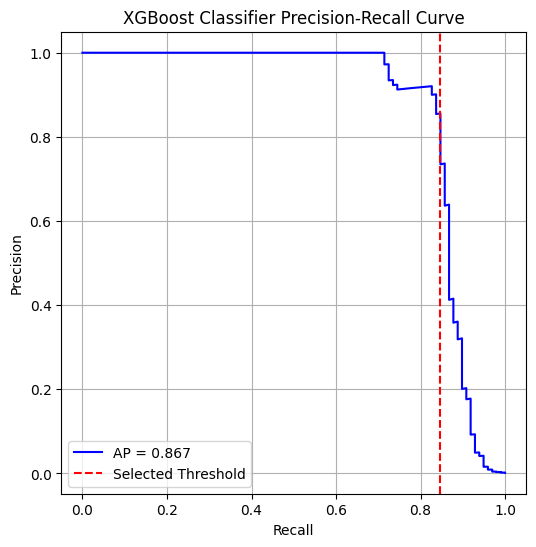

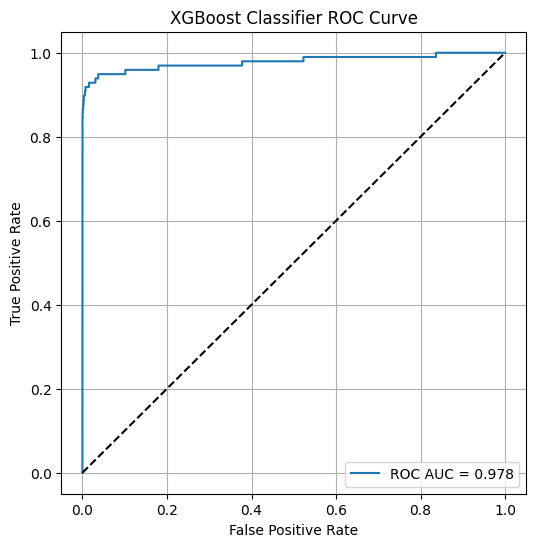

<Figure size 1000x600 with 0 Axes>

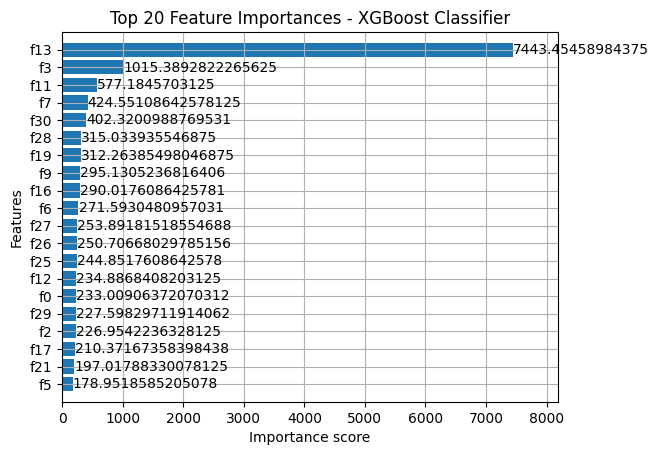

In [152]:
import pandas as pd


# -------------------------
# 1️⃣ Load your data
# -------------------------
# Assume `data` has features V1-V28, 'Time', 'Amount', and 'Class'
X = transformed_data.drop(columns=['Class'])
y = transformed_data['Class']

# -------------------------
# 2️⃣ Split train/test
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------
# 3️⃣ Scale features
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 4️⃣ Apply SMOTE to training set (After splitting!)
# -------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# -------------------------
# 5️⃣ Train Logistic Regression
# -------------------------
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_res, y_train_res)

# -------------------------
# 6️⃣ Train XGBoost with scale_pos_weight
# -------------------------
N_pos = sum(y_train == 1)
N_neg = sum(y_train == 0)
scale_pos_weight = N_neg / N_pos

xgb_model = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    max_depth=5,
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# -------------------------
# Helper function to evaluate model
# -------------------------
def evaluate_model(model, X_test, y_test, model_name="Model", target_precision=0.8):
    print(f"\n===== {model_name} =====")

    y_probs = model.predict_proba(X_test)[:, 1]

    precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_probs)
    threshold_index = np.where(precision_vals[1:] >= target_precision)[0][0]
    best_threshold = thresholds[threshold_index]

    print(f"Selected threshold: {best_threshold:.3f}")
    print(f"Precision at threshold: {precision_vals[threshold_index+1]:.3f}")
    print(f"Recall at threshold: {recall_vals[threshold_index+1]:.3f}")

    # Apply threshold
    y_pred_thresh = (y_probs >= best_threshold).astype(int)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_thresh))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_thresh)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # PR-AUC
    ap_score = average_precision_score(y_test, y_probs)
    print(f"Average Precision (PR-AUC): {ap_score:.3f}")

    # Plot PR curve
    plt.figure(figsize=(6,6))
    plt.plot(recall_vals, precision_vals, label=f"AP = {ap_score:.3f}", color="b")
    plt.axvline(recall_vals[threshold_index+1], color='r', linestyle='--', label='Selected Threshold')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot ROC curve
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Feature importance plots
    if model_name == "Logistic Regression":
        coef = np.abs(model.coef_[0])
        sorted_idx = np.argsort(coef)[::-1]
        plt.figure(figsize=(10,6))
        plt.bar(range(len(coef)), coef[sorted_idx], tick_label=X.columns[sorted_idx])
        plt.xticks(rotation=90)
        plt.ylabel("Coefficient Magnitude")
        plt.title(f"Feature Importance - {model_name}")
        plt.show()
    elif model_name == "XGBoost Classifier":
        plt.figure(figsize=(10,6))
        plot_importance(model, max_num_features=20, importance_type='gain', height=0.8)
        plt.title(f"Top 20 Feature Importances - {model_name}")
        plt.show()


evaluate_model(lr_model, X_test_scaled, y_test, model_name="Logistic Regression")
evaluate_model(xgb_model, X_test_scaled, y_test, model_name="XGBoost Classifier")
